<a id="top"></a>

# Hotel Bookings (Classification)

# Outline

- [Read Data](#read_data)
- [Create target and features](#create_y_and_X)
- [Split data into train and test](#train_test_split)
- [View descriptive statistics](#descriptive_statistics)
- [View target and feature distributions](#distributions)
- [View correlations](#correlations)
- [View relationships between target and features](#pair_plots)
- [Standardize predictors](#standardize_predictors)
- [Predictive models](#predictive_models)
- [Logistic regression](#logistic_regression)
- [K-nearest neighbors](#k_nearest_neighbors)
- [Linear discriminant analysis](#linear_discriminant_analysis)
- [Support vector machines](#support_vector_machines)
- [Extremely Randomized Trees](#extra_trees)
- [Compare models](#compare_models)

# Import packages

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from time import time
from pprint import pprint

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, cohen_kappa_score, precision_recall_fscore_support

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

<a id="read_data"></a>

# Read data

In [3]:
bookings_filepath = 'https://github.com/cbrownley/2022MLWEEK_MLWITHPYTHON/blob/main/data/hotel_bookings.csv.gz?raw=true'

df_raw = pd.read_csv(bookings_filepath, compression='gzip')

In [4]:
df_raw.head()

,is_requested,effective_daily_price,cleaning_fee,checkouts,reviews,days_since_last_booking,image_quality_score,total_overall_rating,professional_pictures,checkin_gap,...,person_capacity_3,person_capacity_4,person_capacity_5,person_capacity_6,person_capacity_7,person_capacity_8,person_capacity_9,cancel_policy_3,cancel_policy_4,cancel_policy_5
0,True,145.849886,22.450342,0.0,0.0,62.76247,0.925428,0.0,0.0,7.0,...,0,0,0,1,0,0,0,1,0,0
1,False,108.297186,0.000000,0.0,0.0,62.76247,0.774094,0.0,0.0,7.0,...,0,0,0,0,0,0,0,1,0,0
2,False,70.860004,0.000000,0.0,0.0,62.76247,0.082612,0.0,0.0,7.0,...,0,0,0,0,0,0,0,0,1,0
3,True,44.800000,0.000000,8.0,7.0,181.00000,0.447015,30.0,0.0,7.0,...,0,0,0,0,0,0,0,0,1,0
4,True,48.479527,28.286623,32.0,22.0,39.00000,0.531061,105.0,18.0,7.0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df_raw.shape

(94595, 400)

In [6]:
list(df_raw.columns)

['is_requested',
 'effective_daily_price',
 'cleaning_fee',
 'checkouts',
 'reviews',
 'days_since_last_booking',
 'image_quality_score',
 'total_overall_rating',
 'professional_pictures',
 'checkin_gap',
 'checkout_gap',
 'occ_plus_minus_7_ds_night',
 'occ_plus_minus_14_ds_night',
 'occupancy_trailing_90_ds',
 'min_nights',
 'max_nights',
 'price_booked_most_recent',
 'listing_views_2_6_ds_night',
 'unique_searchers_0_6_ds_night',
 'contacts_0_6_ds_night',
 'reserve_requests_0_6_ds_night',
 'is_booked_0_6_ds_night',
 'avail_listings_ds_night',
 'kdt_score',
 'r_kdt_views_0_6_avg_n100',
 'r_kdt_n_active_n100',
 'r_kdt_n_available_n100',
 'r_kdt_price_n100_p50',
 'r_kdt_price_available_n100_p50',
 'r_kdt_price_booked_n100_p50',
 'is_instant_bookable',
 'has_wireless_internet',
 'ds_night_is_weekend',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'day_of_year_2',
 'day_of_year_3',
 'day_of_year_4',
 'day_of_year_5',
 'day_of_

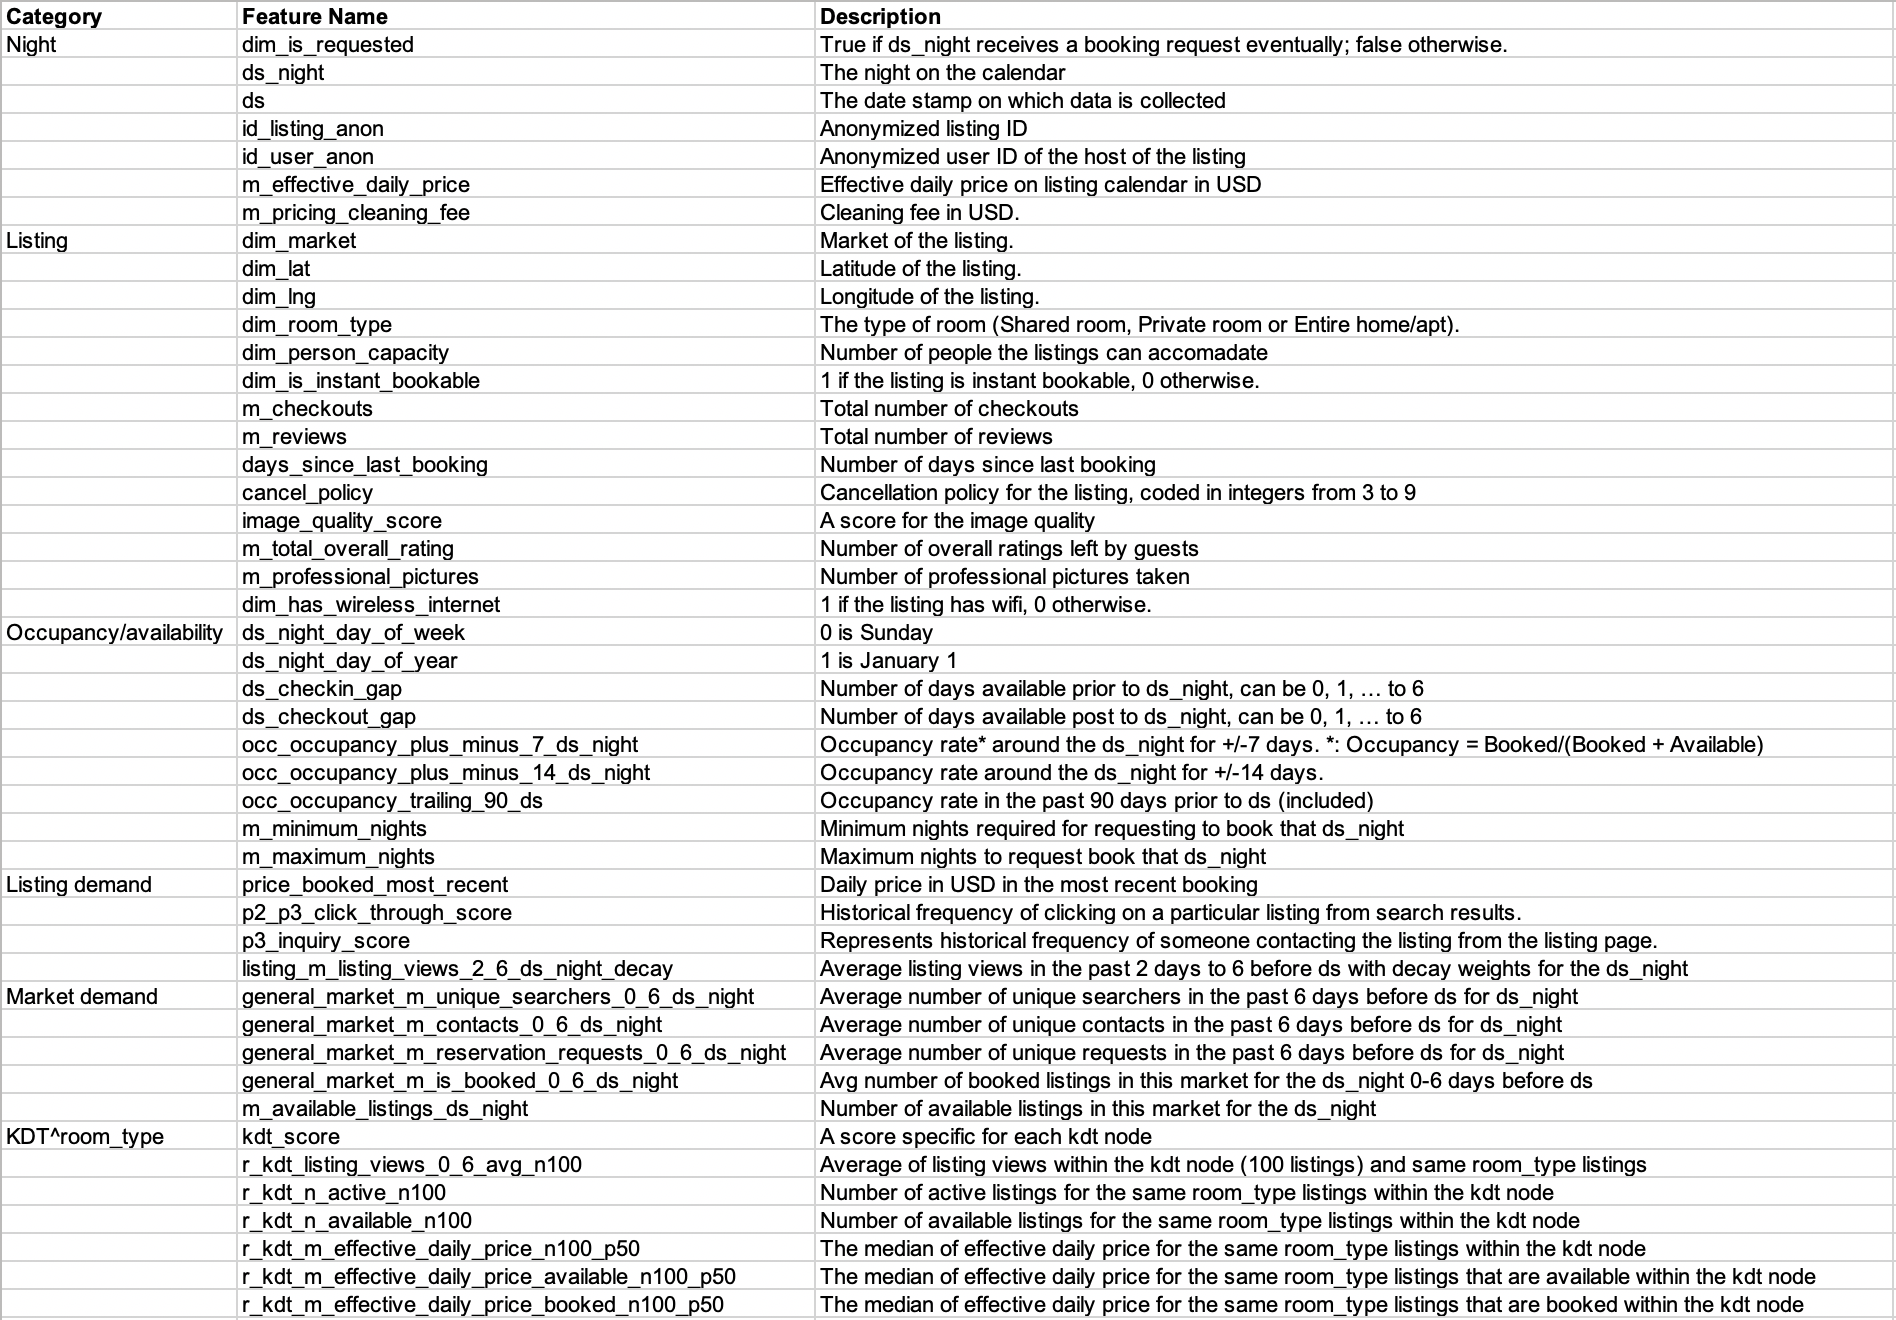

In [8]:
Image(filename='../images/hotel_bookings_feature_descriptions.png', width=900)

<a id="create_y_and_X"></a>

# Create [target, y, and predictor, X, variables](https://scipy-lectures.org/packages/scikit-learn/index.html)

<a id="train_test_split"></a>

# [Split data into train and test sets](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

<a id="descriptive_statistics"></a>

# View [descriptive statistics](https://pandas.pydata.org/docs/getting_started/basics.html#descriptive-statistics)

# Check for [missing values](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

<a id="distributions"></a>

# [View](https://seaborn.pydata.org/tutorial.html) target distribution

# [View](https://seaborn.pydata.org/tutorial.html) predictor distributions

<a id="correlations"></a>

# View predictor  [correlations](https://en.wikipedia.org/wiki/Correlation_and_dependence)

<a id="pair_plots"></a>

# [View](https://seaborn.pydata.org/tutorial.html) distributions of, and relationships between, target and predictors

<a id="standardize_predictors"></a>

# [Standardize](https://scikit-learn.org/stable/modules/preprocessing.html) the Predictors

# [View](https://seaborn.pydata.org/tutorial.html) standardized predictor distributions

<a id="predictive_models"></a>

# Predictive Models

# [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) estimator

# [Confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

# [Classification report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report)

# [ROC curve](https://scikit-learn.org/stable/auto_examples/plot_roc_curve_visualization_api.html)

<a id="logistic_regression"></a>

# [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

# [Predicted class labels](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

# [Predicted probabilities of class labels](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

# [Cross-validation score](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics) score on test set

In [338]:
from sklearn.model_selection import cross_val_score

def get_cross_val(clf, X, y, model_name, cv_num=5, metric='f1'):
    scores = cross_val_score(clf, X, y, cv=cv_num, scoring=metric)
    mean = scores.mean()
    std  = scores.std()
    p025 = np.quantile(scores, 0.025)
    p975 = np.quantile(scores, 0.975)
    metrics = ['mean', 'standard deviation', 'p025', 'p975']
    s = pd.Series([mean, std, p025, p975], index=metrics)  # np.where(lb < 0, 0, lb), np.where(ub > 1, 1, ub)
    s.name = model_name
    return s

In [ ]:
lr_cv = get_cross_val(lr_clf, X_test_std, y_test, 'logistic regression')
lr_cv.round(2)

# [Confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

# [Classification report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report)

# A collection of metrics for comparing models

In [342]:
def calculate_metrics(y_true, y_pred, duration, model_name, *args):
    acc     = accuracy_score(y_true, y_pred)
    pre     = precision_score(y_true, y_pred)
    rec     = recall_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    f1      = f1_score(y_true, y_pred)
    ck      = cohen_kappa_score(y_true, y_pred)
    p, r, fbeta, support = precision_recall_fscore_support(y_true, y_pred)
    metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1_score', 'cohen_kappa',  
               'precision_both', 'recall_both', 'fbeta_both', 'support_both', 'time_to_fit (seconds)']
    s = pd.Series([acc, pre, rec, roc_auc, f1, ck, p, r, fbeta, support, duration], index=metrics)
    s.name = model_name
    return s

In [ ]:
lr_metrics = calculate_metrics(y_test, y_pred, lr_duration, 'logistic_regression')
lr_metrics

# [ROC curve](https://scikit-learn.org/stable/auto_examples/plot_roc_curve_visualization_api.html)

<a id="k_nearest_neighbors"></a>

# [K-Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)

# Cross-validation score on test set

In [ ]:
knn_cv = get_cross_val(gs_knn, X_test_std, y_test, 'k-nearest neighbors')
knn_cv.round(2)

# Confusion matrix

# Classification report

# A collection of metrics for comparing models

In [ ]:
knn_metrics = calculate_metrics(y_test, y_pred, knn_duration, 'k-nearest neighbors')
knn_metrics

# ROC curve

<a id="linear_discriminant_analysis"></a>

# [Linear Discriminant Analysis](https://scikit-learn.org/stable/modules/lda_qda.html)

# Cross-validation score on test set

In [ ]:
lda_cv = get_cross_val(lda_clf, X_test_std, y_test, 'linear discriminanat analysis')
lda_cv.round(2)

# Confusion matrix

# Classification report

# A collection of metrics for comparing models

In [ ]:
lda_metrics = calculate_metrics(y_test, y_pred, lda_duration, 'linear discriminant analysis')
lda_metrics

# ROC curve

<a id="support_vector_machines"></a>

# [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#classification)

# Cross-validation score on test set

In [ ]:
svc_cv = get_cross_val(gs_svc, X_test_std, y_test, 'support vector machines')
svc_cv.round(2)

# Confusion matrix

# Classification report

# A collection of metrics for comparing models

In [ ]:
svc_metrics = calculate_metrics(y_test, y_pred, svc_duration, 'support vector machines')
svc_metrics

# ROC curve

<a id="extra_trees"></a>

# [Extremely Randomized Trees](https://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees)

# Cross-validation score on test set

In [ ]:
clf_et = ExtraTreesClassifier(n_estimators=gs_et.best_params_['n_estimators'], 
                              max_features=gs_et.best_params_['max_features'], 
                              max_depth=gs_et.best_params_['max_depth'], 
                              criterion=gs_et.best_params_['criterion'], 
                              random_state=0, 
                              n_jobs=3)

et_cv = get_cross_val(clf_et, X_test_std, y_test, 'extra trees')
et_cv.round(2)

# Confusion matrix

# Classification report

# A collection of metrics for comparing models

In [ ]:
et_metrics = calculate_metrics(y_test, y_pred, et_duration, 'extra trees')
et_metrics

# ROC curve

# [Variable importances](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html) in the extra trees model

<a id="compare_models"></a>

# Compare Models

# Classification metrics scores and time-to-fit models (in seconds)

In [ ]:
model_metrics = pd.concat([lr_metrics, knn_metrics, lda_metrics, svc_metrics, et_metrics], axis=1).T

model_metrics.apply(lambda elem: [np.round(val, 2) for val in elem]).sort_values(by='f1_score', ascending=False)

# Cross-validation scores on test set

In [ ]:
cross_vals = pd.concat([lr_cv, knn_cv, lda_cv, svc_cv, et_cv], axis=1).T

cross_vals = cross_vals.round(2).sort_values(by='mean', ascending=False)
cross_vals

# Plot of mean (+/- std) cross-validation scores

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in range(len(cross_vals.index)):
    plt.errorbar(x=i, y=cross_vals.iloc[i, 0], # mean column
                 xerr=0.25,
                 yerr=cross_vals.iloc[i, 1], # standard deviation column   alternatively: [mean - p025, p975 - mean],
                 linestyle='',
                 label=list(cross_vals.index)[i])

#plt.ylim(0.7,1)
plt.title('Mean F1 Score (+/- 1 std) by Model,\nbased on 5-fold cross-validation on the test set')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.legend(loc='lower left');

[Back to top](#top)